# Description
Hello,<br>
In this project, I will implement the Logistic Regression model. I applied this model to another dataset before, but that dataset did not consist of pictures, this time my dataset consists of pictures and I will use these pictures to predict gender. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.<br>

I improve myself in data science and machine learning. With this project, I am making my first attempt at deep learning topics. I will share my projects on learning machine learning and data science in this section.<br>

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/gpiosenka/gender-classification-from-an-image)

Data Science And Machine Learning Projects:<br>
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Contents
- [Prepare Dataset For Logistic Regression](#1)
- [Logistic Regression](#2)
    - [Step by step Logistic Regression](#lr1)
    - [Logistic Regression with Sklearn Library](#lr2)
- [CONCLUSION](#3)

# Prepare Dataset For Logistic Regression <a id="1"></a>

In [1]:
# Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import cv2 
import os 
from random import shuffle  
from tqdm import tqdm 
from PIL import Image

# filter warnings and not show warnings
import warnings
warnings.filterwarnings('ignore')

Location of my data

In [2]:
Train_Female = "../input/gender-classification-from-an-image/gender/train/female"
Train_Male = "../input/gender-classification-from-an-image/gender/train/male"
Test_Female = "../input/gender-classification-from-an-image/gender/test/female"
Test_Male = "../input/gender-classification-from-an-image/gender/test/male"

Female example image 

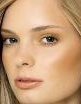

In [3]:
Image.open("../input/gender-classification-from-an-image/gender/train/female/0023.jpg")

Male example image

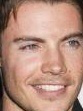

In [4]:
Image.open("../input/gender-classification-from-an-image/gender/train/male/0023.jpg")

I convert images to gray format with "cv2.IMREAD_GRAYSCALE".

100%|██████████| 1744/1744 [00:05<00:00, 303.02it/s]


(-0.5, 63.5, 63.5, -0.5)

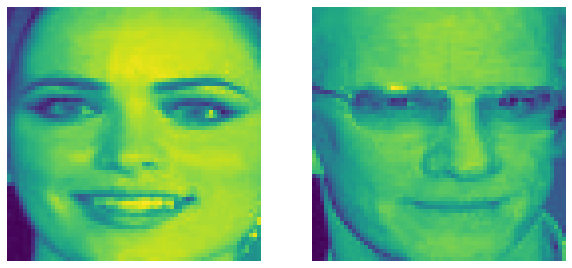

In [5]:
image_size = 64
for image1 in tqdm(os.listdir(Train_Female)):
    path = os.path.join(Train_Female, image1)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img = np.asarray(img)
    
for image2 in tqdm(os.listdir(Train_Male)):
    path2 = os.path.join(Train_Male, image2)
    img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    np_img2 = np.asarray(img2)
    
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')

I prepare the function for constitute to train_data and test_data.

In [6]:
def train_data():
    train_data_female = []
    train_data_male = []
    for image1 in tqdm(os.listdir(Train_Female)):
        path = os.path.join(Train_Female, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_female.append(img1)
        
    for image2 in tqdm(os.listdir(Train_Male)): 
        path2 = os.path.join(Train_Male, image2)
        img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_male.append(img2) 
    
    Train_data = np.concatenate((np.asarray(train_data_female), np.asarray(train_data_male)), axis = 0)
    return Train_data

In [7]:
def test_data():
    test_data_female = []
    test_data_male = []
    
    for image1 in tqdm(os.listdir(Test_Female)): 
        path = os.path.join(Test_Female, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_female.append(img1)
        
    for image2 in tqdm(os.listdir(Test_Male)): 
        path2 = os.path.join(Test_Male, image2)
        img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_male.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_female),np.asarray(test_data_male)),axis=0) 
    return test_data 

In [8]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 100/100 [00:00<00:00, 337.61it/s]


I combine the train_data and test_data that I prepared and I apply and normalize the dataset I have combined.

In [9]:
X_data = np.concatenate((train_data, test_data), axis = 0)
X_data = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data))

I am preparing my dataset Y, which consists of zeros and ones.

In [10]:
z1 = np.zeros(1747)
o1 = np.ones(1744)
Y_train = np.concatenate((o1, z1), axis = 0)
z = np.zeros(100)
o = np.ones(100)
Y_test = np.concatenate((o, z), axis = 0)

In [11]:
Y_data = np.concatenate((Y_train, Y_test), axis = 0).reshape(X_data.shape[0],1)

In [12]:
print("X shape: ", X_data.shape)
print("Y shape: ", Y_data.shape)

X shape:  (3691, 64, 64)
Y shape:  (3691, 1)


Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.15, random_state = 42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [14]:
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test, x_test.shape[1] * x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (3137, 4096)
X test flatten (554, 4096)


In [15]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 3137)
x test:  (4096, 554)
y train:  (1, 3137)
y test:  (1, 554)


# Logistic Regression <a id = "2"></a>

## Step by step Logistic Regression <a id = "lr1"></a>

In [16]:
# I specify the weight(w) and bias(b) variable.
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1), 0.01)
    b = 0.0
    return w, b

# I find sigmoid values with weight, bias, and image values.
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

"""
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_head * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    return cost
"""

# This is a step of logistic regression. In this step I find the gender of to image (female and male).
# I calculate loss and cost values. These are error values.
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_head * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

# In this step, I specify the weight(w) and bias(b) for the best coherence of my dataset.
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
            
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters, gradients, cost_list

# Chapter of Predict
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    return Y_prediction

# Logistic Regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 0: 10.659855
Cost after iteration 100: 0.320866
Cost after iteration 200: 0.345652
Cost after iteration 300: 0.354530
Cost after iteration 400: 0.365113
Cost after iteration 500: 0.377500
Cost after iteration 600: 0.391845
Cost after iteration 700: 0.409124
Cost after iteration 800: 0.431126
Cost after iteration 900: 0.452766
Cost after iteration 1000: 0.455547
Cost after iteration 1100: 0.450848
Cost after iteration 1200: 0.446172
Cost after iteration 1300: 0.441785
Cost after iteration 1400: 0.437673


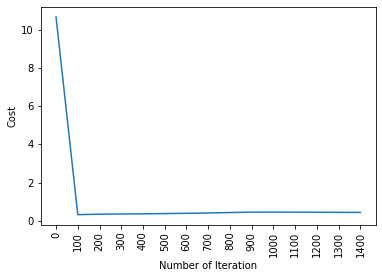

Test Accuracy: 81.95 %
Train Accuracy: 84.25 %


In [17]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

## Logistic Regression with Sklearn Library <a id = "lr2"></a>

I use GridSearch because I want to find the best parameters of logistic regression.

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)

print("test accuracy: {} ".format(lr.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(lr.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.8303249097472925 
train accuracy: 0.9126554032515142 


In [19]:
from sklearn.model_selection import GridSearchCV

grid = {"C": np.logspace(-3,3,7),"penalty":["l1","l2"]}

lr_gs = GridSearchCV(lr, grid, cv = 10)
lr_gs.fit(x_train.T, y_train.T)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [20]:
print("The best hyperparameters of the GridSearch model", lr_gs.best_params_)
print("Accuracy: ", lr_gs.best_score_)

The best hyperparameters of the GridSearch model {'C': 0.1, 'penalty': 'l2'}
Accuracy:  0.8393429112146681


In [21]:
New_lr = LogisticRegression(C= 0.1, penalty = "l2", random_state = 42)
New_lr.fit(x_train.T, y_train.T)


print("test accuracy: {} ".format(New_lr.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(New_lr.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.8357400722021661 
train accuracy: 0.8992668154287536 


# CONCLUSION <a id = "3"></a>
****
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.